### Created by: Anthony D. Cho
### Last update: 24.10.2021

**Subject**: Classification (Logistic regression, GridSearch, RandomSearch, Cross-Validation) - Applied to Breast Cancer Coimbra

In [1]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact#, interact_manual

from pandas import read_csv
import matplotlib.pyplot as plt
from numpy import linspace, argmin
from scipy.stats import uniform

%matplotlib inline

## Pre-processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve

## Models
from sklearn.linear_model import LogisticRegression

## Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, RepeatedKFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

## Grid search and random search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Problem: Breast Cancer Coimbra

**Target**: Classification column of the dataset

**Data source:**

[Breast Cancer Coimbra](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra) (Classification)


In [2]:
## Data loading
dataClassification = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
coefNameIndep = dataClassification.columns[:-1]

In [3]:
dataClassification.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
## Target (Classification label) counter
dataClassification['Classification'].value_counts(ascending=True)

1    52
2    64
Name: Classification, dtype: int64

 ### Data Pre-processsing

In [5]:
## Predictors (features) data 
X = dataClassification.drop(columns=['Classification'])

## target labels
y = dataClassification['Classification']

## Data partition 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Data standardization
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

### Cross-Validation methods application

In [6]:
## Cross-validation method instances
CVs = {'KFold': KFold(n_splits=5, shuffle=True, random_state=0), 
       'LeaveOneOut': LeaveOneOut(),
       'RepeatedKFold': RepeatedKFold(n_splits=5, n_repeats=2, random_state=0),
       'ShuffleSplit': ShuffleSplit(n_splits=5, train_size=0.7, random_state=0), 
       'StratifiedKFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
       'StratifiedShuffleSplit': StratifiedShuffleSplit(n_splits=5, train_size=0.7, random_state=0)
      }

In [7]:
## Model building
model = LogisticRegression()

## Computamos los scores con cada metodo de Cross-validation
for name in CVs.keys():
    
    ## Compute score using cross-validation
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, 
                             n_jobs=-1, cv=CVs[name])
    
    ## Display mean and variance of scores
    print('CV: {:>23s}, Mean Scores: {:.4f}, Variance Scores:{:.4f}'.format(name, 
                                                                            scores.mean(), 
                                                                            scores.var()))

CV:                   KFold, Mean Scores: 0.7137, Variance Scores:0.0083
CV:             LeaveOneOut, Mean Scores: 0.7126, Variance Scores:0.2048
CV:           RepeatedKFold, Mean Scores: 0.7075, Variance Scores:0.0092
CV:            ShuffleSplit, Mean Scores: 0.6889, Variance Scores:0.0036
CV:         StratifiedKFold, Mean Scores: 0.7020, Variance Scores:0.0108
CV:  StratifiedShuffleSplit, Mean Scores: 0.7259, Variance Scores:0.0042


### Precision-Recall Curve

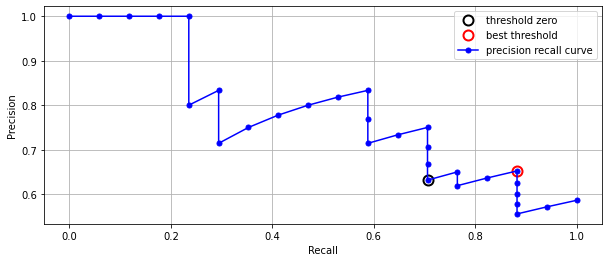

In [8]:
## Model fitting
model.fit(X=X_train, y=y_train)

## Compute precision, recall and threshold (only Binary class)
precision, recall, thresholds = precision_recall_curve(y_true=y_test-1,
                                                       probas_pred=model.decision_function(X_test))

## Find threshold closest to zero
close_zero = argmin(abs(thresholds))

## Find the best threshold closest to upper-right corner, i.e (1, 1)-coordinate
(x,y) = (1,1)

distance = []
for a, b in zip(precision, recall):
    distance.append( ((x-a)**2 + (y-b)**2)**(0.5) )
best = argmin(distance)

## Display Precision-Recall Curve, zero-threshold and best-threshold
plt.figure(figsize=(10, 4))
plt.plot(recall[close_zero], precision[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(recall[best], precision[best], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(recall, precision, 'bo-', label="precision recall curve", markersize=5)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc="best")
plt.grid()
plt.show()


In [9]:
print('Best threshold: {}'.format(thresholds[best]))

Best threshold: -0.5945498698071702


### ROC Curve

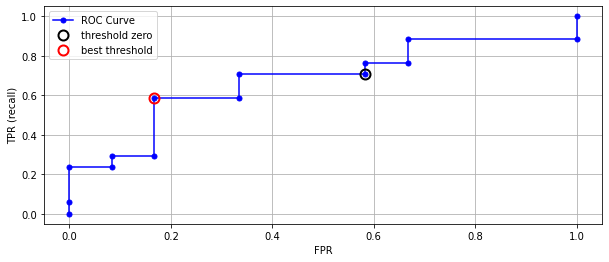

In [10]:
## Model fitting
model.fit(X=X_train, y=y_train)

## Compute false positive rate, true positive rate and threshold (only Binary class)
fpr, tpr, thresholds = roc_curve(y_true=y_test-1, y_score=model.decision_function(X_test))

## Find threshold closest to zero
close_zero = argmin(abs(thresholds))

## Find the best threshold closest to upper-left corner, i.e (0, 1)-coordinate
(x,y) = (0,1)

distance = []
for a, b in zip(fpr, tpr):
    distance.append( ((x-a)**2 + (y-b)**2)**(0.5) )
best = argmin(distance)

## Display ROC Curve, zero-threshold and best-threshold
plt.figure(figsize=(10, 4))
plt.plot(fpr, tpr, 'bo-', label="ROC Curve", markersize=5)
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(fpr[best], tpr[best], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc="best");
plt.grid()
plt.show()


In [11]:
best = argmin(distance)
print('Best threshold: {}'.format(thresholds[best]))

Best threshold: 0.9435015672074748


In [12]:
thresholds

array([13.96231052, 12.96231052,  3.88146442,  2.56989665,  2.39349042,
        2.17707567,  0.94350157,  0.6932704 ,  0.49030318,  0.12880133,
       -0.23320757, -0.3087115 , -0.59454987, -0.85573807, -1.14621626])

### GridSearch + Cross Validation

In [13]:
## Parameters search-space
param = {'C': linspace(0.001, 10, 100)}

## Cross-Validation method instace
cvs = StratifiedShuffleSplit(n_splits=10, train_size=0.7, random_state=0)

## Model instance
model = LogisticRegression(n_jobs=-1, solver='newton-cg', max_iter=10000)

## Grid search instance and model fitting
gs = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1).fit(X=X_train, y=y_train)

## Display best parameter value and its score
print('Best C-value: {:.4f}. Score: {:.4f}'.format(gs.best_params_['C'], 
                                                   gs.best_score_))

Best C-value: 1.4150. Score: 0.7497


In [14]:
## Display the best model
gs.best_estimator_

LogisticRegression(C=1.415, max_iter=10000, n_jobs=-1, solver='newton-cg')

In [15]:
## Compute score of the best model using test data
gs.score(X=X_test, y=y_test)

0.5862068965517241

### RandomSearch + Cross Validation

In [16]:
## Parameters search-space
param = {'C': uniform(0,100)}

## Cross-Validation method instace
cvs = StratifiedShuffleSplit(n_splits=15, train_size=0.7, random_state=0)

## Model instance
model = LogisticRegression(n_jobs=-1, solver='newton-cg', max_iter=10000)

## Random search instance and model fitting
gs = RandomizedSearchCV(estimator=model, 
                        param_distributions=param, 
                        n_jobs=-1, n_iter=100).fit(X=X_train, y=y_train)

## Display best parameter value and its score
print('Best C-value: {:.4f}. Score: {:.4f}'.format(gs.best_params_['C'], 
                                                   gs.best_score_))

Best C-value: 4.2391. Score: 0.7497


In [17]:
## Display the best model
gs.best_estimator_

LogisticRegression(C=4.239115817914096, max_iter=10000, n_jobs=-1,
                   solver='newton-cg')

In [18]:
## Compute score of the best model using test data
gs.score(X=X_test, y=y_test)

0.5862068965517241